<a href="https://colab.research.google.com/github/Jmorgado125/ADA-Informes/blob/main/RadixSort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Radix Sort 

##1. Descripcion del Problema 

Problema de Ordenamiento de elementos, ya sean valores numericos o Strings, en tiempo polinomial con la utilizacion del **Radix Sort**.

*    **Entrada:**Secuencia de elementos $a_n$ sin ningun requisito de orden en la entrada $[a_1',a_2',...,a_n']$.
*    **Salida:**Intercambio ordenado de los elementos dentro de la secuencia , de manera que $[a_1 < a_2 < a_3 ... <a_n]$ de menor a mayor, o $[a_1 > a_2 > a_3 ... >a_n]$ o tambien de orden alfabetico.

![image](https://imgur.com/9SjgGWx.png)

El algoritmo a estudiar es el **Radix Sort**, el cual su funcion es hacer una ordenación dígito a dígito empezando por el dígito menos significativo hasta el más significativo ,su complejidad es de $O(n+k)$ en su caso promedio, y $O(n*k)$ en su peor cas . La ordenación radix utiliza el **Counting Sort** como una subrutina para ordenar.

#2.Descripcion del algoritmo

El **Radix sort**, utiliza un algoritmo Estable como el **Counting Sort**, este es un algoritmo de ordenación en tiempo lineal que ordena en tiempo $O(n+k)$ cuando los elementos están en el rango de 1 a k, el problema de este algoritmo es que si los elementos van del rango de 1 a $n^2$ su complejidad es de $O(n^2)$ es por eso que se complementa con el Radix Sort .

El **counting sort** es estable, es decir ,los números con el mismo valor aparecen en la matriz de salida en el mismo orden que en la matriz de entrada.

El algoritmo recibe un arreglo de entrada A y retorna un arreglo ordenado B. Además usa un arreglo auxiliar para contar elementos C.

> ⨀ Para cada elemento $x$ del arreglo, usamos un contador $C[x]$ para contar los elementos menores o iguales a $x$.
>
> ⨀ Recorremos nuevamente el arreglo **desde el final**. Colocamos cada elemento en el arreglo de salida **directamente en la posición que le corresponde**. Por ejemplo si un elemento $x$ tiene 1**7 elementos menores o iguales** a él, lo colocamos en B[17].
>
> ⨀ Cada vez que coloquemos un elemento $x$, debemos reducir en 1 el contador $C[x]$.

*Pseudocodigo*


![image](https://imgur.com/ZkIdZhA.png)

**Radix Sort** es un algoritmo de ordenación no comparativo. Evita la comparación creando y distribuyendo los elementos en cubos según su digito. Para los elementos con más de un dígito significativo, este proceso de agrupación se repite para cada dígito, conservando el orden del paso anterior, hasta que se hayan considerado todos los dígitos.







![image](https://imgur.com/OfSO4VV.png)

*Pseudocodigo*

![image](https://imgur.com/oMvjrGj.png)


(*Couting sort es el metodo estable de ordenamiento*)

##2.1 Implementacion Counting Sort

In [20]:
def countingSort(arr, exp1,verbose=False):
 
    n = len(arr)
 
    # Arreglo final inicializado con 0
    output = [0] * (n)
 
    # Arreglo aux utilizado para el conteo inicializado en 0
    count = [0] * (10)
 
    # Contar ocurrencia de los numeros rellenando el arreglo de ocurrencia (aux)
    for i in range(0, n):
        index = arr[i] // exp1
        count[index % 10] += 1
 
    # posicion de los elementos en el arreglo de salida segun su ocuurencia - 1 
    for i in range(1, 10):
        count[i] += count[i - 1]
 
    # situando los elementos en el arreglo de salida
    i = n - 1
    while i >= 0:
        index = arr[i] // exp1
        output[count[index % 10] - 1] = arr[i]
        count[index % 10] -= 1
        i -= 1
 
    #Copiar los elementos del arreglo de salida en el arr principal ya ordenados
    i = 0
    for i in range(0, len(arr)):
        arr[i] = output[i]

##2.2 Implementacion Radix Sort

In [21]:
def radixSort(arr):
 
    # obtenemos el valor maximo del arreglo con la funcion max()
    max1 = max(arr)
    #Se aplica la funcion counting sort pasando por cada exp (10^i)
    exp = 1
    while max1 / exp >= 1:
        countingSort(arr, exp)
        exp *= 10

array = [10,22,14,51,123,532,53,86,9,1,586]
print("Arreglo inicial :",array)
radixSort(array)
print("Arreglo Ordenado :",array)

Arreglo inicial : [10, 22, 14, 51, 123, 532, 53, 86, 9, 1, 586]
Arreglo Ordenado : [1, 9, 10, 14, 22, 51, 53, 86, 123, 532, 586]


#3. Correctitud







##3.1 Correctitud Counting Sort



##3.2 Correctitud Radix Sort

#4. Tiempo de Ejecucion

# 5. Experimentacion

##5.1 Experimento Radix Sort vs Counting Sort

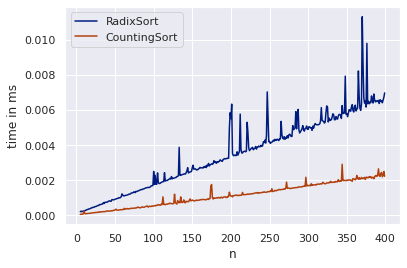

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import random
from timeit import repeat

%matplotlib inline

sns.set(context='notebook', style='darkgrid', palette='dark')

x=[]; x2 =[]
y=[]; y2=[]

for n in range(5,400):

  a = random.sample(range(1, 1000), n)
  t = repeat(setup="from __main__ import radixSort", stmt=f"radixSort({a})", repeat=1, number=10)

  x.append(n)
  y.append(t)

for n in range(5,400):

  a = random.sample(range(1, 1000), n)
  t = repeat(setup="from __main__ import countingSort", stmt=f"countingSort({a},{max(a)})", repeat=1, number=10)

  x2.append(n)
  y2.append(t)

plt.plot(x,y)
plt.plot(x2,y2)
plt.legend(["RadixSort", "CountingSort"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

Con el experimento notamos que el couting sort sin importar su entrada, funciona en tiempo lineal, haciendo mas eficiente que el Radix Sort.

##5.2 Experimento Radix Sort vs Bucket Sort

(*implementacion bucketSort para la comparacion*)

In [18]:
def bucketSort(array):
    largest = max(array)
    length = len(array)
    size = largest/length
 
    
    buckets = [[] for i in range(length)]
 
  
    for i in range(length):
        index = int(array[i]/size)
        if index != length:
            buckets[index].append(array[i])
        else:
            buckets[length - 1].append(array[i])
 
   
    for i in range(len(array)):
        buckets[i] = sorted(buckets[i])
 
 
 
    result = []
    for i in range(length):
        result = result + buckets[i]
             
    return result

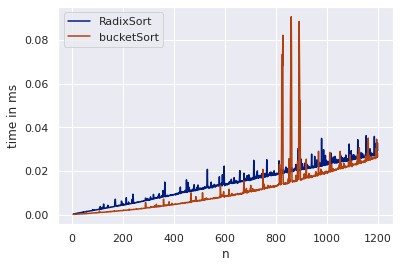

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import random
from timeit import repeat

%matplotlib inline

sns.set(context='notebook', style='darkgrid', palette='dark')

x=[]; x2 =[]
y=[]; y2=[]

for n in range(5,1200):

  a = random.sample(range(0,1500),n)
  t = repeat(setup="from __main__ import radixSort", stmt=f"radixSort({a})", repeat=1, number=10)

  x.append(n)
  y.append(t)

for n in range(5,1200):

  a = random.sample(range(0,1500),n)
  t = repeat(setup="from __main__ import bucketSort", stmt=f"bucketSort({a})", repeat=1, number=10)

  x2.append(n)
  y2.append(t)

plt.plot(x,y)
plt.plot(x2,y2)
plt.legend(["RadixSort", "bucketSort"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

En la grafica observamos como el **BucketSort** es mas eficiente con arreglos con N menores, pero a medida que aumenta la cantidad de elementos observamos que la curva se eleva por sobre el **RadixSort**. 

##5.3 Experimento Radix Sort vs QuickSort

(*Implementacion QuickSort para la comparacion con RadixSort*)

In [ ]:
def partitionHigh(array, low, high,cont):
  
  pivot = array[high]   #Eleccion de pivote, como el ultimo elemento
  i = low - 1
  ct=cont   
  for j in range(low, high):
    ct=ct+1
    if array[j] <= pivot:
      ct=ct+1
      i = i + 1
      (array[i], array[j]) = (array[j], array[i])
  
  (array[i + 1], array[high]) = (array[high], array[i + 1])
  
  return i + 1, ct   

def quick_sort(array, low, high):
  cont=0
  if low < high:
    pi,cont = partitionHigh(array, low, high,cont)
    quick_sort(array, low, pi - 1)
    quick_sort(array, pi + 1, high)
    return cont 

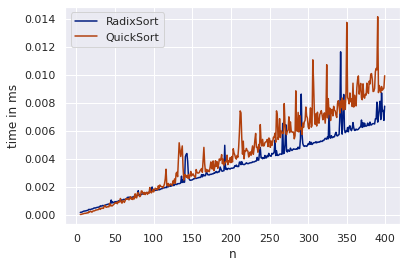

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import random
from timeit import repeat

%matplotlib inline

sns.set(context='notebook', style='darkgrid', palette='dark')

x=[]; x2 =[]
y=[]; y2=[]

for n in range(5,400):

  a = random.sample(range(1, 1000), n)
  t = repeat(setup="from __main__ import radixSort", stmt=f"radixSort({a})", repeat=1, number=10)

  x.append(n)
  y.append(t)

for n in range(5,400):

  a = random.sample(range(1, 1000), n)
  t = repeat(setup="from __main__ import quick_sort", stmt=f"quick_sort({a},{0},{len(a)-1})", repeat=1, number=10)

  x2.append(n)
  y2.append(t)

plt.plot(x,y)
plt.plot(x2,y2)
plt.legend(["RadixSort", "QuickSort"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

Podemos observar que con arreglos de n bajos es mas eficiente el QuickSort, pero luego con arreglos con n mayores, se vuelve mas eficiente la utilizacion del **RadixSort**.